<a href="https://colab.research.google.com/github/Nai5lf/Projects/blob/main/Customer_churn_prediction_(supervised_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

---

There are numerous telecom providers around the world and this has led to a huge rise in competition and hence customer churn (the rate at which customers stop doing business with a company). Churn occurs mainly due to customer dissatisfaction and identifying this requires a lot of parameters; a customer usually does not churn due to a single dissatisfaction scenario. Companies typically gather data from customers and this eventually builds up the customer's behavioral data. Such  data can be used to help with churn prediction.

The goal of machine learning is to solve problems that humans are not capable of solving. This helps improve decision making and provides better insights or predictions.

This project aims to compare and evaluate several supervised classification machine learning techniques to predict customer churn. I compare various aspects of the selected models such as differences in their performance, precision and time execusion to identify the best performing model for predicting churn.

The dataset used includes data on customer churn, demographics, tenure, and services used, among others. The data comes from [Kaggle](https://www.kaggle.com/zagarsuren/telecom-churn-dataset-ibm-watson-analytics?) and contains 7,043 observations and 21 variables.

# **2. Exploratory data analysis**

---

## **2.1 Imports and Dataframe Load**

In [ ]:
import pandas as pd
import numpy as np
import math
import time
from datetime import timedelta
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.metrics import  classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# creating a dataframe
churn = pd.read_excel("https://github.com/naiel-khalaf/Think-data/raw/master/datasets_42343_72434_WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Now that the dataset is loaded into the DataFrame `churn`, it is now time to begin the EDA. The first step of any EDA is data cleaning

In [ ]:
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
churn.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# getting count of unique values for our varibales in our dataframe
churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# checking unique values and their count
churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
# checking unique values and their count
churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
# checking unique values and their count
churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
# checking unique values and their count
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**After the data exploration we can see the following:**
- There are 21 columns (features) and 7043 rows (obsevations)
- There is no missing data
- There are 18 columns with categorical variables as follows: 


> 1.   7 of which have values of 'yes', 'no' or a third 'No phone service/No internet service'. *We can use Dummy coding here*
2.   'Partner' and 'Dependents' both have 2 values 'yes' or 'no'. *We can use Dummy coding here*
3.   'PhoneService' has 2 values 'yes' or 'no'. *We can use Dummy coding here*
4.   'InternetService' has 3 values 'Fiber optic', 'DSL' or 'No'. *We can use Dummy coding here*
5.   'gender' has 2 values 'Male' or 'Female'. *We can use Dummy coding here*
6.   'SeniorCitizen' is already '1' or '0'. *Nothing to be done here* 
7.   'Contract' has 3 values. *We can use Dummy coding here*
8.   'PaperlessBilling' has 2 values 'yes' or 'no'. *We can use Dummy coding here*
9.   'PaymentMethod' has 4 values. *We can use Dummy coding here*
10.   'Churn' has 2 values 'yes' or 'no'. 
11.   WE will drop the 'customerID' column since it will not be used in our study

- There are 3 columns with continuous variables

> 1. 'tenure'
2. 'MonthlyCharges'
3. 'TotalCharges'





## **2.2 Data cleaning**

In [ ]:
# Making sure there is no missing data
churn.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# making sure there are no blanks, '?' or '--' and if there are we will convert them to NaN
churn.replace({'?': np.nan, '--': np.nan, ' ': np.nan}, inplace=True)

In [ ]:
# If there were? we will make sure they were converted to Nan
churn.loc[churn.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# As we can see above 'TotalCharges' has 11 values that were changed Nan. They were probably blanks
# Dropping Nan rows since they are only 11 rows. That is less than 0.02% of the data
churn.dropna(axis=0, inplace=True)

# Dropping the customerID column since we won't be using it
churn.drop(['customerID'], axis = 1, inplace = True)

# Checking if column was dropped
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
churn['SeniorCitizen'].loc[churn['SeniorCitizen'] == 1] = 'Yes' 
churn['SeniorCitizen'].loc[churn['SeniorCitizen'] == 0] = 'No'

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## **2.3 Data Exploration**

In [ ]:
# Descriptive Statistics (continuous variables)
churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
# Descriptive Statistics (categorical variables)
churn.describe(include='O')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
columns = churn.columns
print(columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


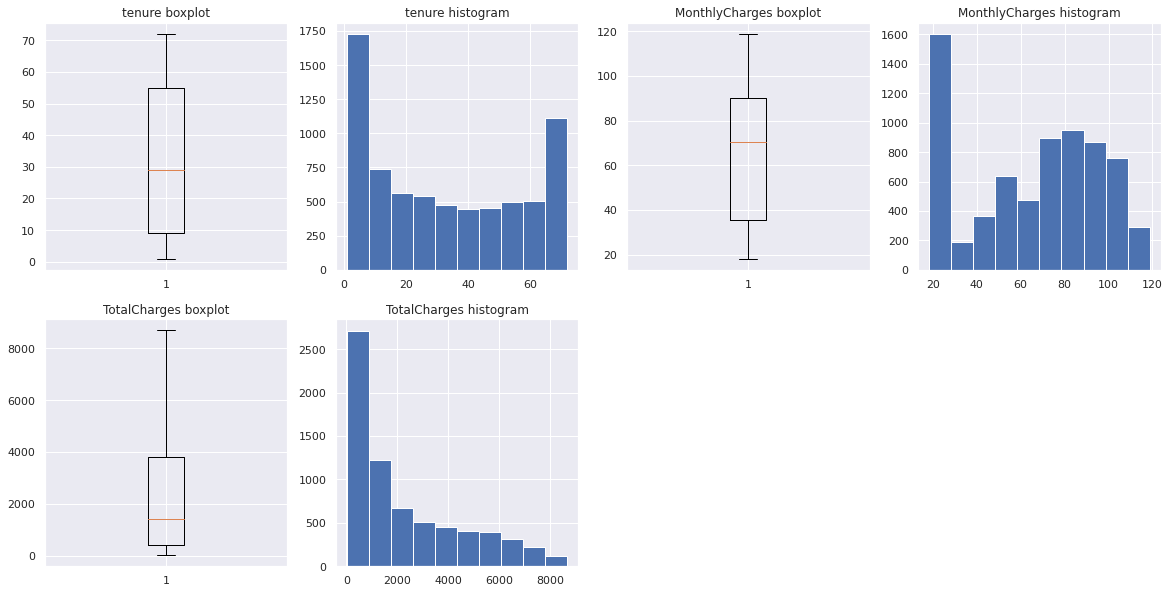

In [ ]:
# plotting continuous variables (boxplots and histograms)
cont_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20,10))

i = 0
for column in cont_vars:
    i += 1
    plt.subplot(2, 4, i)
    plt.boxplot(churn[column])
    plt.title('{} boxplot'.format(column))
    i += 1
    plt.subplot(2, 4, i)
    plt.hist(churn[column])
    plt.title('{} histogram'.format(column))
plt.show()


#B = plt.boxplot(data)
#[item.get_ydata() for item in B['whiskers']]

In [ ]:
for column in cont_vars:
    print(column)
    q75, q25 = np.percentile(churn[column], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((churn[column] > max_val) | (churn[column] < min_val))[0])
    outlier_percent = round(outlier_count/len(churn[column])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    print(40*'-')

tenure
Number of outliers: 0
Percent of data that is outlier: 0.0%
----------------------------------------
MonthlyCharges
Number of outliers: 0
Percent of data that is outlier: 0.0%
----------------------------------------
TotalCharges
Number of outliers: 0
Percent of data that is outlier: 0.0%
----------------------------------------


As we can see above, there are no outliers

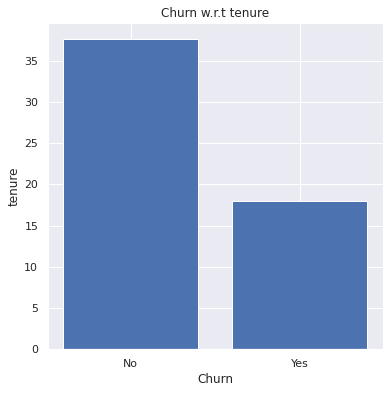

In [ ]:
# target variable 'Churn' w.r.t 'tenure'
plt.figure(figsize=(6,6))
plt.bar(churn.groupby('Churn')['Churn'].count().index,churn.groupby('Churn')['tenure'].mean())
plt.xlabel('Churn',fontsize=12)
plt.ylabel('tenure',fontsize=12)
plt.title('Churn w.r.t tenure')
plt.show()

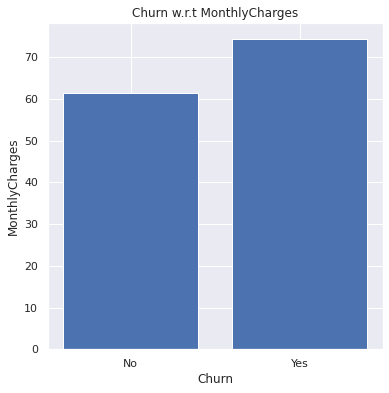

In [ ]:
# target variable 'Churn' w.r.t 'MonthlyCharges'
plt.figure(figsize=(6,6))
plt.bar(churn.groupby('Churn')['Churn'].count().index,churn.groupby('Churn')['MonthlyCharges'].mean())
plt.xlabel('Churn',fontsize=12)
plt.ylabel('MonthlyCharges',fontsize=12)
plt.title('Churn w.r.t MonthlyCharges')
plt.show()

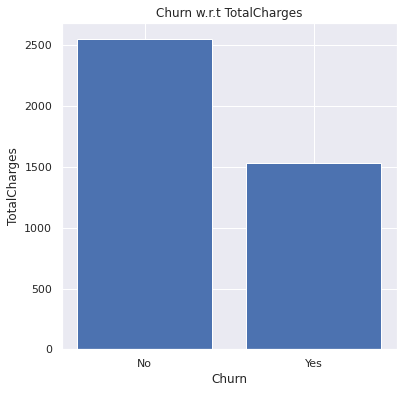

In [ ]:
# target variable 'Churn' w.r.t 'TotalCharges'
plt.figure(figsize=(6,6))
plt.bar(churn.groupby('Churn')['Churn'].count().index,churn.groupby('Churn')['TotalCharges'].mean())
plt.xlabel('Churn',fontsize=12)
plt.ylabel('TotalCharges',fontsize=12)
plt.title('Churn w.r.t TotalCharges')
plt.show()

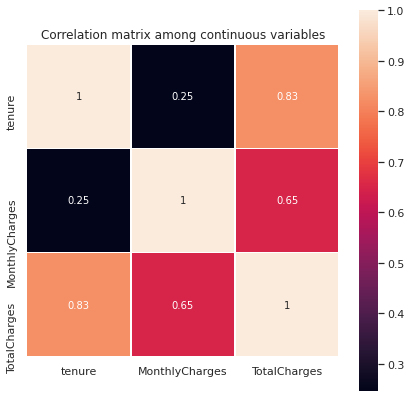

In [ ]:
cormat = churn.corr()
plt.figure(figsize=(7,7))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title('Correlation matrix among continuous variables')
plt.show()

In [ ]:
churn.groupby('Churn').describe().T

Churn                          No          Yes
tenure         count  5163.000000  1869.000000
               mean     37.650010    17.979133
               std      24.076940    19.531123
               min       1.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5163.000000  1869.000000
               mean     61.307408    74.441332
               std      31.094557    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.450000    79.650000
               75%      88.475000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5163.000000  1869.000000
               mean   2555.344141  1531.796094
               std    2329.456984  1890.822994
               min      18.800000    18.850000
               25%     577.825000   134.500000
               50%    1683.600000   703.550000
               75%    4264.125000  2331.300000
               max    8672.450000  8684.800000

In [ ]:
cat_vars = churn.select_dtypes(['object']).columns
print(cat_vars)
print("The number of non-numerical columns is {}".format(len(cat_vars)))

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
The number of non-numerical columns is 17


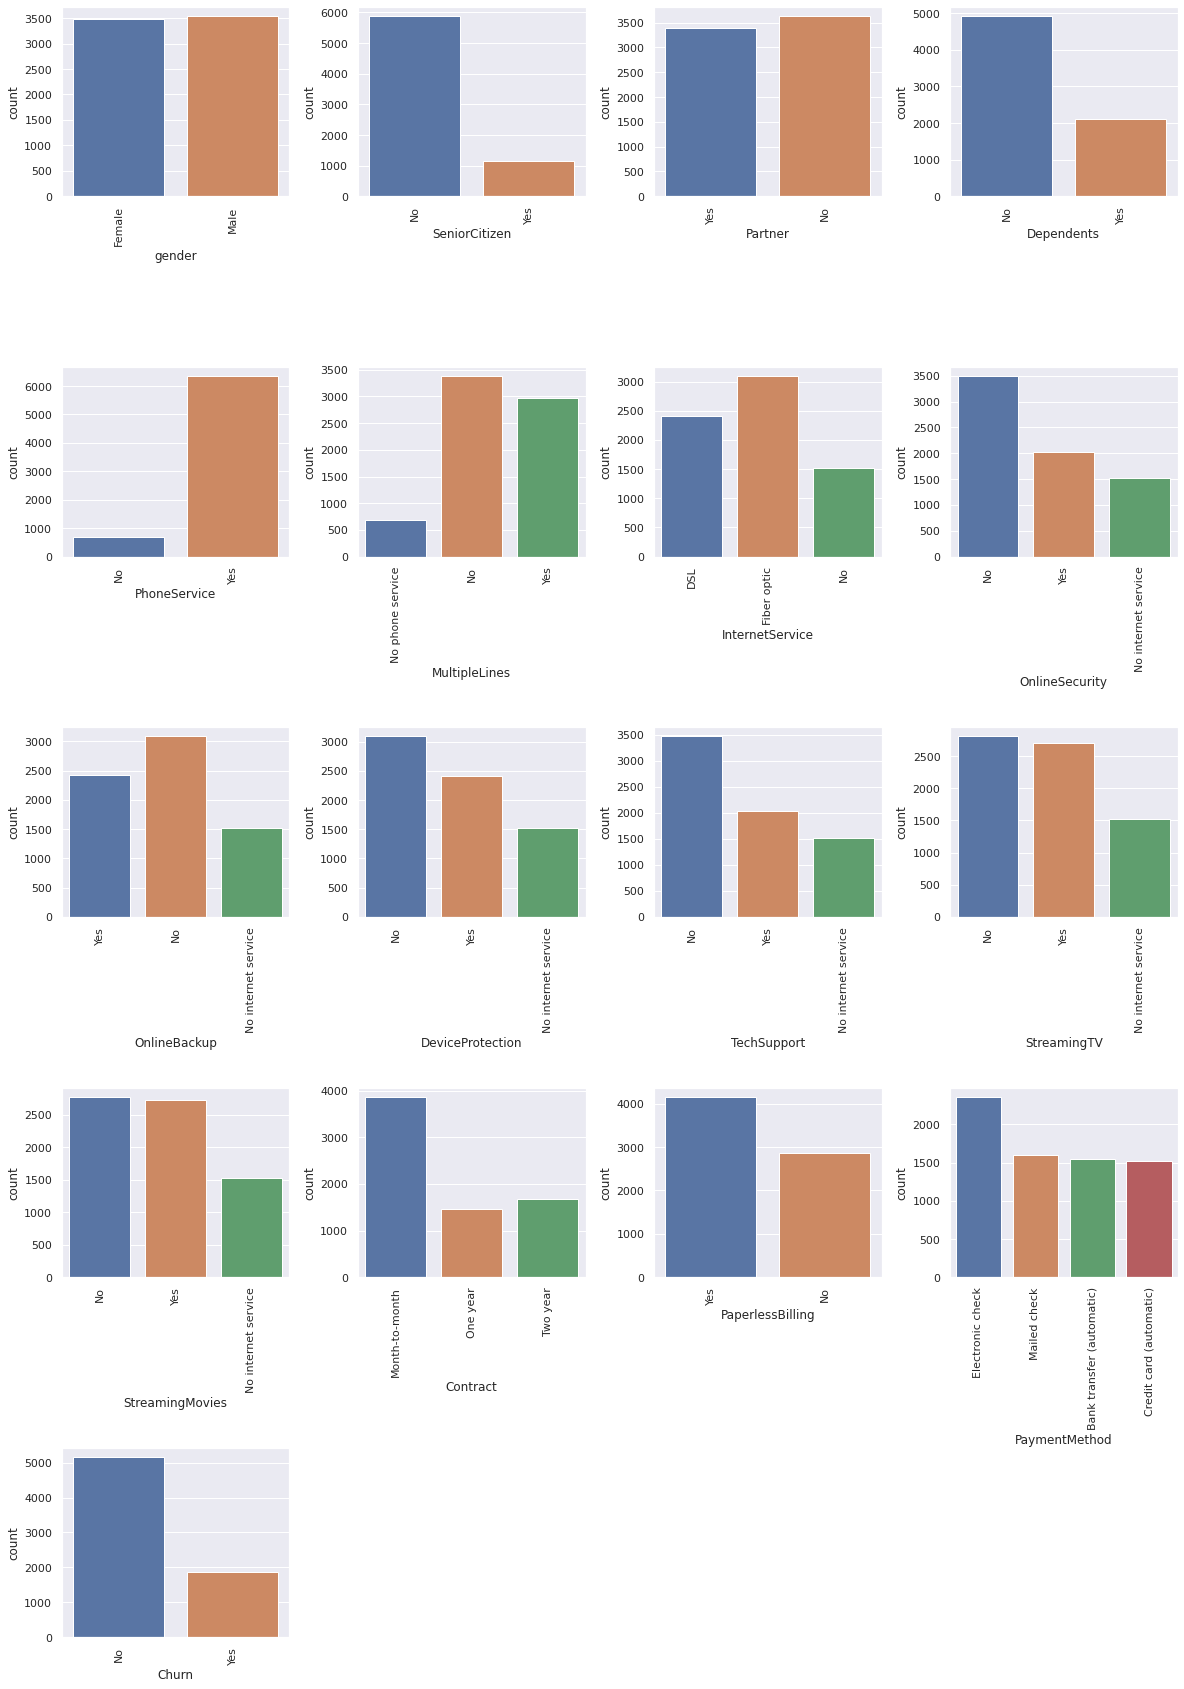

In [ ]:
# plotting categorical variables (bar plots)
fig, ax = plt.subplots(5, 4, figsize=(20, 30))
for idx, (variable, subplot) in enumerate(zip(cat_vars, ax.flatten())):
    sns.countplot(churn[variable], ax=subplot)
    plt.subplots_adjust(wspace=.3, hspace=.9)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
else:
    [ax.set_visible(False) for ax in ax.flatten()[idx+1:]]

# **3. Hold-out (splitting the data)**

---

In [ ]:
# y is the target variable
y = churn['Churn']
# X is the feature set
X = churn.drop('Churn', 1)
X = pd.get_dummies(X)
X = X.dropna(axis=1)

In [ ]:
# Split (hold-out)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   gender_Female                            7032 non-null   uint8  
 4   gender_Male                              7032 non-null   uint8  
 5   SeniorCitizen_No                         7032 non-null   uint8  
 6   SeniorCitizen_Yes                        7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

# **4. Feature Engineering**

---

Here, I will try feature selection using SelectKbest vs dimensionality reduction using PCA.

## **4.1 SelectKBest**

In [ ]:
# Create the object for SelectKBest and fit and transform the classification data (K=15 the best 15 features)
selector = SelectKBest(score_func=chi2, k=15)
selector.fit_transform(X_test,y_test)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_test_Kbest = X_test.iloc[:,cols]

In [ ]:
X_test_Kbest.head()

,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check
5414,64,105.65,6903.10,1,1,0,0,0,0,0,0,0,0,0,0
1251,1,75.80,75.80,1,1,0,0,0,1,0,0,0,1,0,1
5423,13,80.85,1008.70,1,1,0,0,0,1,0,0,0,1,0,1
6676,41,94.30,3893.60,1,0,0,0,0,1,0,0,0,1,0,0
4080,29,26.10,692.55,0,0,1,1,1,0,1,1,1,0,1,0


## **4.2 PCA**

In [ ]:
# We will use StandardScaler to help standardize the dataset’s features onto unit scale
from sklearn.preprocessing import StandardScaler

X_test_std = StandardScaler().fit_transform(X_test)

Text(0, 0.5, 'cumulative explained variance')

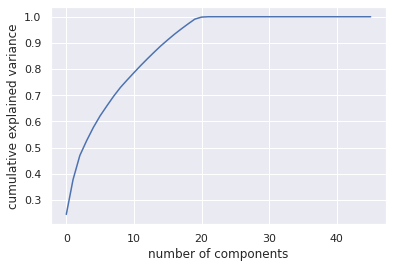

In [ ]:
# We will plot explained variance ratio and choose a number of components that "capture" at least 90% of the variance
from sklearn.decomposition import PCA

pca = PCA().fit(X_test_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# We will get the PCA using 15 components as per the plot above (90% of variance)
pca = PCA(n_components = 15)
principalComponents = pca.fit_transform(X_test_std)
pcaDf_test_std = pd.DataFrame(data = principalComponents)

In [ ]:
pcaDf_test_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1407 non-null   float64
 1   1       1407 non-null   float64
 2   2       1407 non-null   float64
 3   3       1407 non-null   float64
 4   4       1407 non-null   float64
 5   5       1407 non-null   float64
 6   6       1407 non-null   float64
 7   7       1407 non-null   float64
 8   8       1407 non-null   float64
 9   9       1407 non-null   float64
 10  10      1407 non-null   float64
 11  11      1407 non-null   float64
 12  12      1407 non-null   float64
 13  13      1407 non-null   float64
 14  14      1407 non-null   float64
dtypes: float64(15)
memory usage: 165.0 KB


# **5. Models**

---

## **5.1. Models using features from SelectKbest**

### **5.1.1. Decision Tree - Classifier (SelectKbest)**



**Using GridSearchCV to get the best parameters**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
# Using GridSearchCV to get the best parameters
tree_para = {'criterion':['gini','entropy'], 'splitter':['best','random'], 'max_depth':np.arange(3, 50)}
dtree_model = DecisionTreeClassifier(random_state = 1)
dt_clf = GridSearchCV(dtree_model, tree_para, cv=5)
dt_clf.fit(X_test_Kbest, y_test)
tree_model = dt_clf.best_estimator_
print (dt_clf.best_score_, dt_clf.best_params_) 

0.7832184952424219 {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}


**Training and timing the Decision Tree - Classifier model**

In [ ]:
# train the model (Decision Tree / SelectKbest)

# Time the decision tree
start_time = time.monotonic()

tr_dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4 , splitter = 'random', random_state = 1)
tr_dt_clf.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the decission tree: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the decission tree: 0:00:00.020450


**Decision Tree - Classifier (SelectKbest) confusion matrix**

In [ ]:
# confusion matrix

# generate predictions on the test data
churn_dt_Kb_predicion = tr_dt_clf.predict(X_test)
confusion = confusion_matrix(y_test, churn_dt_Kb_predicion, labels=['Yes', 'No'])
print(confusion)

[[146 211]
 [ 89 961]]


**Decision Tree - Classifier (SelectKbest) classification report**

In [ ]:
# classification report

churn_dt_Kb_report = classification_report(y_test, churn_dt_Kb_predicion)
print(churn_dt_Kb_report)

              precision    recall  f1-score   support

          No       0.82      0.92      0.86      1050
         Yes       0.62      0.41      0.49       357

    accuracy                           0.79      1407
   macro avg       0.72      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



### **5.1.2. Random Forest (SelectKbest)**

**Using GridSearchCV to get the best parameters**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
rf_param = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150, 200, 300, 1000] 
}   
# Create a based model
rf_model = RandomForestClassifier(random_state = 2)
# Instantiate the grid search model
rf_clf = GridSearchCV(rf_model, rf_param, cv = 5, n_jobs = -1, verbose = 2)
rf_clf.fit(X_test_Kbest, y_test)
rfc_model = rf_clf.best_estimator_
print (rf_clf.best_score_, rf_clf.best_params_)         

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 44.8min


0.79175689659524 {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 49.8min finished


**Training and timing the random forest model**

In [ ]:
# train the model (Random Forest Classifier / SelectKbest)

# Time the Random Forest Classifier
start_time = time.monotonic()


tr_rf_clf = RandomForestClassifier(bootstrap = 'True', max_depth = 80 , max_features = 2, 
                                   min_samples_leaf = 3, min_samples_split = 10, n_estimators = 50,
                                   random_state = 2)
tr_rf_clf.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the random forest: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the random forest: 0:00:00.195668


**Random Forest (SelectKbest) confusion matrix**

In [ ]:
# confusion matrix

# generate predictions on the test data
churn_rf_Kb_predicion = tr_rf_clf.predict(X_test)
confusion = confusion_matrix(y_test, churn_rf_Kb_predicion, labels=['Yes', 'No'])
print(confusion)

[[153 204]
 [ 99 951]]


**Random Forest (SelectKbest) classification report**

In [ ]:
# classification report

churn_rf_Kb_report = classification_report(y_test, churn_rf_Kb_predicion)
print(churn_rf_Kb_report)

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1050
         Yes       0.61      0.43      0.50       357

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407



### **5.1.3. KNN (SelectKbest)**

**Using GridSearchCV to get the best parameters**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()

knn_clf = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
knn_clf.fit(X_test_Kbest, y_test)
knn_model = knn_clf.best_estimator_
print (knn_clf.best_score_, knn_clf.best_params_) 

0.7675987841945289 {'n_neighbors': 26, 'weights': 'distance'}


**Training and timing the KNN model**

In [ ]:
# train the model (KNN / SelectKbest)

# Time the Random Forest Classifier
start_time = time.monotonic()


tr_knn_clf = KNeighborsClassifier(n_neighbors = 26, weights = 'distance')
tr_knn_clf.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the KNN: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the KNN: 0:00:00.040414


**KNN (SelectKbest) confusion matrix**

In [ ]:
# confusion matrix

# generate predictions on the test data
churn_knn_Kb_predicion = tr_knn_clf.predict(X_test)
confusion = confusion_matrix(y_test, churn_knn_Kb_predicion, labels=['Yes', 'No'])
print(confusion)

[[154 203]
 [112 938]]


**KNN (SelectKbest) classification report**

In [ ]:
# classification report

churn_knn_Kb_report = classification_report(y_test, churn_knn_Kb_predicion)
print(churn_knn_Kb_report)

              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1050
         Yes       0.58      0.43      0.49       357

    accuracy                           0.78      1407
   macro avg       0.70      0.66      0.68      1407
weighted avg       0.76      0.78      0.76      1407



### **5.1.4. Linear SVC (SelectKbest)**

If more computation power is available SVC would have been a better choice since it is effective in high dimensional spaces. 

**Using GridSearchCV to get the best parameters**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC())])

param_grid = {'SVC__C':np.arange(0.01,100,10), 'SVC__loss': ['hinge', 'squared_hinge']}
linearsvc = GridSearchCV(SVCpipe, param_grid, cv=5, return_train_score=True, verbose=2)
linearsvc.fit(X_test_Kbest, y_test)
linearsvc_model = linearsvc.best_estimator_
print (linearsvc.best_score_, linearsvc.best_params_) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=squared_hinge ............................
[CV] ............. SVC__C=0.01, SVC__loss=squared_hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=squared_hinge ............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. SVC__C=0.01, SVC__loss=squared_hinge, total=   0.0s
[CV] SVC__C=10.01, SVC__loss=hinge ...................................
[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.1s
[CV] SVC__C=10.01, SVC__loss=hinge ...................................
[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.1s
[CV] SVC__C=10.01, SVC__loss=hinge ...................................
[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=10.01, SVC__loss=hinge ...................................
[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.1s
[CV] SVC__C=10.01, SVC__loss=hinge ...................................
[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=10.01, SVC__loss=squared_hinge ...........................
[CV] ............ SVC__C=10.01, SVC__loss=squared_hinge, total=   0.1s
[CV] SVC__C=10.01, SVC__loss=squared_hinge ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.3s finished


**Training and timing the Linear SVC model**

In [ ]:
# train the model (SVC / SelectKbest)

# Time the Random Forest Classifier
start_time = time.monotonic()


tr_svc = LinearSVC(C = 50.01, loss = 'hinge')
tr_svc.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the linearSVC: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the linearSVC: 0:00:00.649122


**Linear SVC (SelectKbest) confusion matrix**

In [ ]:
# confusion matrix

# generate predictions on the test data
churn_svc_Kb_predicion = tr_svc.predict(X_test)
confusion = confusion_matrix(y_test, churn_svc_Kb_predicion, labels=['Yes', 'No'])
print(confusion)

[[292  65]
 [366 684]]


**Linear SVC (SelectKbest) classification report**

In [ ]:
# classification report

churn_svc_Kb_report = classification_report(y_test, churn_svc_Kb_predicion)
print(churn_svc_Kb_report)

              precision    recall  f1-score   support

          No       0.91      0.65      0.76      1050
         Yes       0.44      0.82      0.58       357

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.79      0.69      0.71      1407



### **5.1.5. Logistic regression (SelectKbest)**

**Using GridSearchCV to get the best parameters**

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C' : np.logspace(-4, 4, 20), 
              'penalty' : ['l1', 'l2']}
              
logreg = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
logreg.fit(X_test_Kbest, y_test)
logreg_model = logreg.best_estimator_
print (logreg.best_score_, logreg.best_params_)     


0.7981423992327301 {'C': 0.03359818286283781, 'penalty': 'l2'}


**Training and timing the logistic regression model**

In [ ]:
# train the model (logistic / SelectKbest)

# Time the Random Forest Classifier
start_time = time.monotonic()


tr_logreg_clf = LogisticRegression(C= 0.03359818286283781, penalty= 'l2')
tr_logreg_clf.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the logistic_regression: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the logistic_regression: 0:00:00.173812


**Logisic regression (SelectKbest) confusion matrix**

In [ ]:
# confusion matrix

# generate predictions on the test data
churn_logreg_Kb_predicion = tr_logreg_clf.predict(X_test)
confusion = confusion_matrix(y_test, churn_logreg_Kb_predicion, labels=['Yes', 'No'])
print(confusion)

[[201 156]
 [121 929]]


**Logisic regression (SelectKbest) classification report**

In [ ]:
# classification report

churn_logreg_Kb_report = classification_report(y_test, churn_logreg_Kb_predicion)
print(churn_logreg_Kb_report)

              precision    recall  f1-score   support

          No       0.86      0.88      0.87      1050
         Yes       0.62      0.56      0.59       357

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



## **5.2. Models using features from PCA**

### **5.2.1. Decision Tree (PCA)**

**Using GridSearchCV to get the best parameters**

In [ ]:
tree_param = {'criterion':['gini','entropy'], 'splitter':['best','random'], 'max_depth':np.arange(3, 50)}
dtree_model = DecisionTreeClassifier(random_state = 1)
dt_clf_pca = GridSearchCV(dtree_model, tree_param, cv=5)
dt_clf_pca.fit(pcaDf_test_std, y_test)
tree_model = dt_clf_pca.best_estimator_
print (dt_clf_pca.best_score_, dt_clf_pca.best_params_)

0.7874940057040458 {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}


**Training and timing the decision tree model**

In [ ]:
# train the model (Decision Tree / PCA)

# Time the decision tree 
start_time = time.monotonic()

tr_clf_pca = DecisionTreeClassifier(criterion = 'gini', max_depth = 4 , splitter = 'random', random_state = 1)
tr_clf_pca.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the decission tree: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the decission tree: 0:00:00.022396


**Decision tree (PCA) confusion matrix**



In [ ]:
# confusion matrix

# generate predictions on the test data
churn_dt_pca_predicion = tr_clf_pca.predict(X_test)
confusion = confusion_matrix(y_test, churn_dt_pca_predicion, labels=['Yes', 'No'])
print(confusion)

[[146 211]
 [ 89 961]]


**Decision tree (PCA) classification report**

In [ ]:
# classification report

churn_dt_pca_report = classification_report(y_test, churn_dt_pca_predicion)
print(churn_dt_pca_report)

              precision    recall  f1-score   support

          No       0.82      0.92      0.86      1050
         Yes       0.62      0.41      0.49       357

    accuracy                           0.79      1407
   macro avg       0.72      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



### **5.2.2. Random Forest (PCA)**

**Using GridSearchCV to get the best parameters**

In [ ]:
# Create the parameter grid based on the results of random search 
rf_param = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150, 200, 300, 1000]
}
# Create a based model
rf_pca_model = RandomForestClassifier(random_state = 2)
# Instantiate the grid search model
rf_pca_clf = GridSearchCV(rf_pca_model, rf_param, cv = 5, n_jobs = -1, verbose = 2)
rf_pca_clf.fit(pcaDf_test_std, y_test)
rfc_pca_model = rf_pca_clf.best_estimator_
print (rf_pca_clf.best_score_, rf_pca_clf.best_params_)  

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 52.4min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 65.5min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 79.4min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 90.0min finished


0.788899825849928 {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 100}


**Training and timing the random forest model**

In [ ]:
# train the model (Random Forest Classifier / SelectKbest)

# Time the Random Forest Classifier
start_time = time.monotonic()


tr_rf_pca_clf = RandomForestClassifier(bootstrap= True, max_depth= 80, max_features= 2, 
                                        min_samples_split= 8, n_estimators= 100,
                                        random_state = 2)
tr_rf_pca_clf.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the random forest: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the random forest: 0:00:00.414004


**Random forest (PCA) confusion matrix**

In [ ]:
# confusion matrix

# generate predictions on the test data
churn_rf_pca_predicion = tr_rf_pca_clf.predict(X_test)
confusion = confusion_matrix(y_test, churn_rf_pca_predicion, labels=['Yes', 'No'])
print(confusion)

[[160 197]
 [110 940]]


**Random forest (PCA) classification report**

In [ ]:
# classification report

churn_rf_pca_report = classification_report(y_test, churn_rf_pca_predicion)
print(churn_rf_pca_report)

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1050
         Yes       0.59      0.45      0.51       357

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407



### **5.2.3. KNN (PCA)**

**Using GridSearchCV to get the best parameters**

In [ ]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()

knn_pca_clf = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
knn_pca_clf.fit(pcaDf_test_std, y_test)
knn_pca_model = knn_pca_clf.best_estimator_
print (knn_pca_clf.best_score_, knn_pca_clf.best_params_) 

0.7804052684903748 {'n_neighbors': 23, 'weights': 'uniform'}


**Training and timing the KNN model**

In [ ]:
# train the model (KNN / SelectKbest)

# Time the Random Forest Classifier
start_time = time.monotonic()


tr_knn_pca_clf = KNeighborsClassifier(n_neighbors = 23, weights = 'uniform')
tr_knn_pca_clf.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the KNN: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the KNN: 0:00:00.048023


**KNN (PCA) confusion matrix**

In [ ]:
# confusion matrix

# generate predictions on the test data
churn_knn_pca_predicion = tr_knn_pca_clf.predict(X_test)
confusion = confusion_matrix(y_test, churn_knn_pca_predicion, labels=['Yes', 'No'])
print(confusion)

[[154 203]
 [109 941]]


**KNN (PCA) classification report**

In [ ]:
# classification report

churn_knn_pca_report = classification_report(y_test, churn_knn_pca_predicion)
print(churn_knn_pca_report)

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1050
         Yes       0.59      0.43      0.50       357

    accuracy                           0.78      1407
   macro avg       0.70      0.66      0.68      1407
weighted avg       0.76      0.78      0.77      1407



### **5.2.4. SVC (PCA)**

Using GridSearchCV to get the best parameters

In [ ]:
SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC())])

param_grid = {'SVC__C':np.arange(0.01,100,10), 'SVC__loss': ['hinge', 'squared_hinge']}
linearsvc_pca = GridSearchCV(SVCpipe, param_grid, cv=5, return_train_score=True, verbose=2)
linearsvc_pca.fit(pcaDf_test_std, y_test)
linearsvc_pca_model = linearsvc_pca.best_estimator_
print (linearsvc_pca.best_score_, linearsvc_pca.best_params_) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=hinge ....................................
[CV] ..................... SVC__C=0.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=squared_hinge ............................
[CV] ............. SVC__C=0.01, SVC__loss=squared_hinge, total=   0.0s
[CV] SVC__C=0.01, SVC__loss=squared_hinge ............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.1s
[CV] SVC__C=10.01, SVC__loss=hinge ...................................
[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=10.01, SVC__loss=hinge ...................................
[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=10.01, SVC__loss=hinge ...................................
[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=10.01, SVC__loss=hinge ...................................
[CV] .................... SVC__C=10.01, SVC__loss=hinge, total=   0.0s
[CV] SVC__C=10.01, SVC__loss=squared_hinge ...........................
[CV] ............ SVC__C=10.01, SVC__loss=squared_hinge, total=   0.1s
[CV] SVC__C=10.01, SVC__loss=squared_hinge ...........................
[CV] ............ SVC__C=10.01, SVC__loss=squared_hinge, total=   0.1s
[CV] SVC__C=10.01, SVC__loss=squared_hinge ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.5s finished


**Training and timing the SVC model**


In [ ]:
# train the model (SVC / SelectKbest)

# Time the Random Forest Classifier
start_time = time.monotonic()


tr_svc_pca = LinearSVC(C = 10.01, loss = 'squared_hinge')
tr_svc_pca.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the linearSVC: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the linearSVC: 0:00:00.652580


**SCV (PCA) confusion matrix**

In [ ]:
# confusion matrix

# generate predictions on the test data
churn_svc_pca_predicion = tr_svc_pca.predict(X_test)
confusion = confusion_matrix(y_test, churn_svc_pca_predicion, labels=['Yes', 'No'])
print(confusion)

[[303  54]
 [464 586]]


**SVC (PCA) classification report**

In [ ]:
# classification report

churn_svc_pca_report = classification_report(y_test, churn_svc_pca_predicion)
print(churn_svc_pca_report)

              precision    recall  f1-score   support

          No       0.92      0.56      0.69      1050
         Yes       0.40      0.85      0.54       357

    accuracy                           0.63      1407
   macro avg       0.66      0.70      0.62      1407
weighted avg       0.78      0.63      0.65      1407



### **5.2.5. Logistic regression (PCA)**

**Using GridSearchCV to get the best parameters**

In [ ]:
param_grid = {'C' : np.logspace(-4, 4, 20), 
              'penalty' : ['l1', 'l2']}
              
logreg_pca = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
logreg_pca.fit(pcaDf_test_std, y_test)
logreg_pca_model = logreg_pca.best_estimator_
print (logreg_pca.best_score_, logreg_pca.best_params_)     


0.7945937760278641 {'C': 0.012742749857031334, 'penalty': 'l2'}


**Training and timing the logistic regression model**


In [ ]:
# train the model (logistic / SelectKbest)

# Time the Random Forest Classifier
start_time = time.monotonic()


tr_logreg_pca_clf = LogisticRegression(C= 0.012742749857031334, penalty= 'l2')
tr_logreg_pca_clf.fit(X_train, y_train)

end_time = time.monotonic()
print("\n The time it took to run the logistic_regression: {}".format(timedelta(seconds=end_time - start_time)))


 The time it took to run the logistic_regression: 0:00:00.114936


**logistic regression (PCA) confusion matrix**

In [ ]:
# confusion matrix

# generate predictions on the test data
churn_logreg_pca_predicion = tr_logreg_pca_clf.predict(X_test)
confusion = confusion_matrix(y_test, churn_logreg_pca_predicion, labels=['Yes', 'No'])
print(confusion)

[[196 161]
 [115 935]]


**logistic regression (PCA) classification report**

In [ ]:
# classification report

churn_logreg_pca_report = classification_report(y_test, churn_logreg_pca_predicion)
print(churn_logreg_pca_report)

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1050
         Yes       0.63      0.55      0.59       357

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



# **6. Conclusion**

---

## **6.1. Classification report summary**

### **6.1.1 Execution time**

In regards to model training execution time we can see that the quickest is the Decision tree - Classifier followed by KNN as shown bellow:

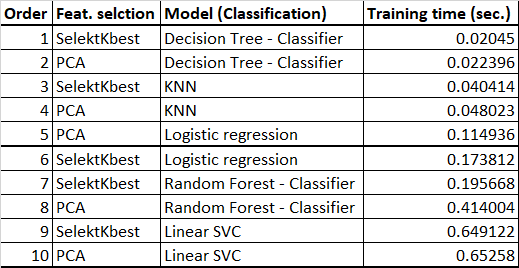

### **6.1.2. Accuracy**

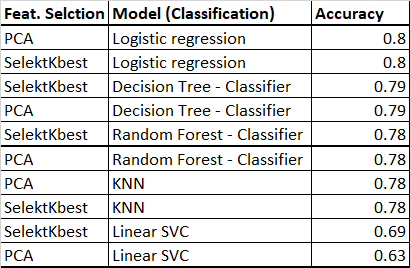

### **6.1.3. Precision**

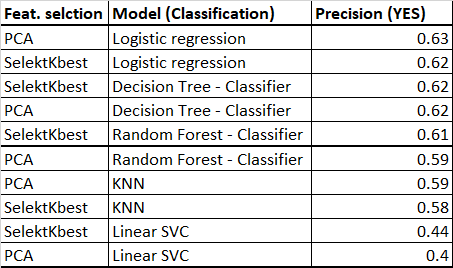

### **6.1.4. Recall**

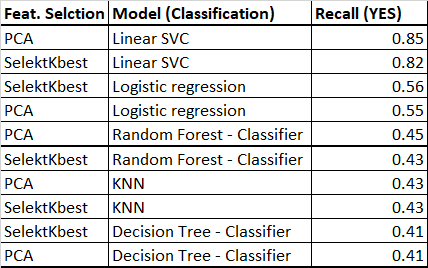

### **6.1.5. F1-score**

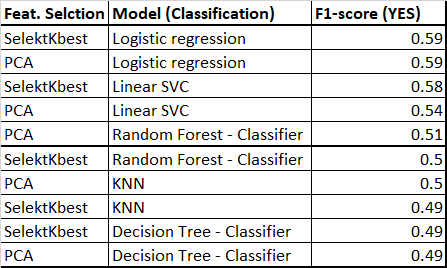

## **6.2. In summary**

Preliminary results show that, the slected models except the linear SVC model show an accuracy of 0.78 up to 0.8 which means our models are approximately 78% - 80% accurate which may seem good at first. Accuracy is a great measure but only if we have symmetric datasets where values of positives and negatives are almost same. This is unlike our churn dataset where there are significantly more Actual Negatives (churn = no) than Actual Positives (churn = yes). Better metrics for evaluating class-imbalanced problems would be precision, recall or maybe f1-score. But at this point which of them should we prioritize.

If a customer is actually leaving the company (Actual Positive) yet the system incorrectly predicted it as not leaving the company (False Negative), the customer might leave if this means their dissatisfaction or other important parameters go undetected and unimproved. There is always a high cost to losing customers (high churn rate) since that means losing market share which simply means losing money. As such, we will accept the lower cost of additional work and further tests that more False Positives might entail before churn is ruled out. In other words, we want to minimise False Negatives at the risk of increasing False Positives. Hence, we prioritize recall then maybe f1-score.

When it comes to recall, Linear SVC is the highest with recall of 0.85. But if we are trying to find a balance between false positives and false negatives in this study then the Logistic regression model would be the better choice since it had the highest f1-score of 0.59.

Future work will include the implementation of more machine learning algorithms with more numerical datasets. Ideally big data can be considered for the comparison of more machine learning algorithms.